In [1]:
import h5py

# import block
from models.application.captioning import CaptionMachine
import h5py as h5
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Model settings
INPUT_SIZE = 128    # size of feature vector
EMBED_SIZE = 128    # size of embedding vector
HIDDEN_SIZE = 128   # size of LSTM hidden state
LSTM_STACK = 1      # stack size of LSTM

In [3]:
# File paths, use absolute path if possible
VOCAB_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/src/saved_models/LSTM/vocabulary.json'
CHECKPOINTS_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/src/saved_models/LSTM/LSTM.pt'
DATASET_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/src/datasets/lung_text/TCGA_Lung_consensus.csv'
HDF5_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/data/raw/hdf5_TCGAFFPE_LUADLUSC_5x_60pc_he_validation.h5'

In [4]:
# Dataset metadata
FULL_NAME_COL = 'full_names'
CONSENSUS_COL = 'consensus'
START_VECTOR_IDX = 14
VECTOR_SIZE = 128

In [5]:
# hdf5 metadata 
HDF5_NAME_FIELD = ('valid_slides', 'valid_tiles')
HDF5_CONCAT = '_'
HDF5_IMAGE_FIELD = 'valid_img'
HDF5_FILTER = 'valid_labels'
HDF5_FILTER_VALUES = (0.0, 1.0, 2.0, 3.0, 4.0)

In [6]:
# create the machine
caption_machine = CaptionMachine.create_LSTM(input_size=INPUT_SIZE,
                                             embed_size=EMBED_SIZE,
                                             hidden_size=HIDDEN_SIZE,
                                             num_layers=LSTM_STACK,
                                             vocab_path=VOCAB_PATH,
                                             checkpoints_path=CHECKPOINTS_PATH,
                                             dataset_path=DATASET_PATH,
                                             dataset_full_name_column_name=FULL_NAME_COL,
                                             dataset_consensus_column_name=CONSENSUS_COL,
                                             dataset_start_of_vector_index=START_VECTOR_IDX,
                                             dataset_vector_length=VECTOR_SIZE,
                                             image_hdf5=HDF5_PATH,
                                             hdf5_image_field=HDF5_IMAGE_FIELD,
                                             hdf5_name_field=HDF5_NAME_FIELD,
                                             hdf5_name_concat=HDF5_CONCAT,
                                             hdf5_filter_field=HDF5_FILTER,
                                             hdf5_filter_value=HDF5_FILTER_VALUES,)

In [7]:
# Try captioning
caption_machine.caption_by_name(full_name = 'TCGA-55-1594-01Z-00-DX1_28_24.jpeg',
                                max_length=50)

Sample: TCGA-55-1594-01Z-00-DX1_28_24.jpeg
No match in HDF5 file.
Cannot find image for sample TCGA-55-1594-01Z-00-DX1_28_24.jpeg.
----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Necrosis 
Actual Caption: Necrosis


Sample TCGA-44-2666-01Z-00-DX1_52_2.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-MP-A4T6-01Z-00-DX1_44_38.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-MP-A4TC-01Z-00-DX1_28_34.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-55-8097-01Z-00-DX1_7_3.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-49-6743-01Z-00-DX2_24_8.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-05-4418-01Z-00-DX1_40_39.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-97-A4M3-01Z-00-DX1_52_15.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-55-6712-01Z-00-DX1_2_11.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-44-6775-01Z-00-DX1_65_4.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-97-8172-01Z-00-DX1_17_14.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-78-7147-01Z-00-DX1_35_3.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-97-A4LX-01Z-00-DX1_49_17.jpeg not found in hdf5. 

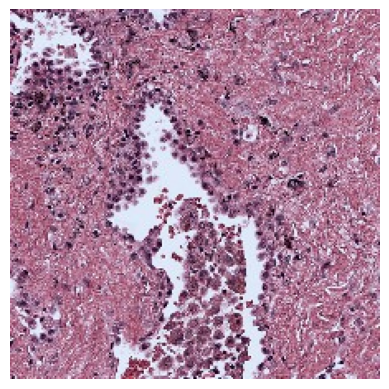

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Compressed normal lung and haemorrhaging smaller airways or vessels 
Actual Caption: Elastotic vessels.


In [10]:
caption_machine.caption_random_image(swap_rgb=True)

Sample: TCGA-97-7554-01Z-00-DX1_47_43.jpeg


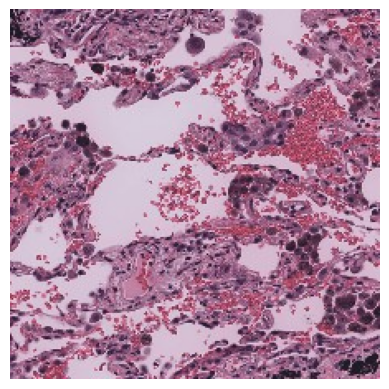

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Haemorrhagic lung. 
Actual Caption: Haemorrhagic lung.


In [9]:
# TCGA-97-7554-01Z-00-DX1_47_43.jpeg
caption_machine.caption_by_name('TCGA-97-7554-01Z-00-DX1_47_43.jpeg', swap_rgb=True)